# 1. Import required libraries & functions

In [ ]:
# Import required libraries & functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pymc as pm
import sys
import os


project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data.preprocess import load_and_clean_price_data, load_and_clean_event_data, save_cleaned_data
from src.modeling.change_point_model import build_model, run_inference, get_change_point, plot_posterior

sns.set(style='whitegrid')


# 2. Load and preprocess the Brent oil price data

In [22]:
# Load cleaned and preprocessed Brent oil price data
df_price = load_and_clean_price_data(input_path=r"C:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\data\raw\BrentOilPrices.csv")
df_events = load_and_clean_event_data(input_path=r"C:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\data\raw\event_data_unprocessed.csv")


price_series = df_price["Price"].values[:100]  # just the first 100 points

🔹 Loading Brent oil price data...
🔹 Cleaning Brent oil price data...


c:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\src\data\preprocess.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


🔹 Loading event data...
🔹 Cleaning event data...


# 3. Build the change point model

In [23]:
# Build the Bayesian model
model = build_model(price_series)
model

  tau ~ DiscreteUniform(f(), f())
  mu1 ~ Normal(19, 0.733)
  mu2 ~ Normal(19, 0.733)
sigma ~ HalfNormal(0, 0.733)
  obs ~ Normal(f(mu1, mu2, tau), sigma)

# 4. Run inference (MCMC sampling)

In [24]:
# Run sampling using NUTS
trace = run_inference(model, draws=1000, tune=1000, target_accept=0.95)


Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu1, mu2, sigma]


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


# 5. Plot posterior distributions

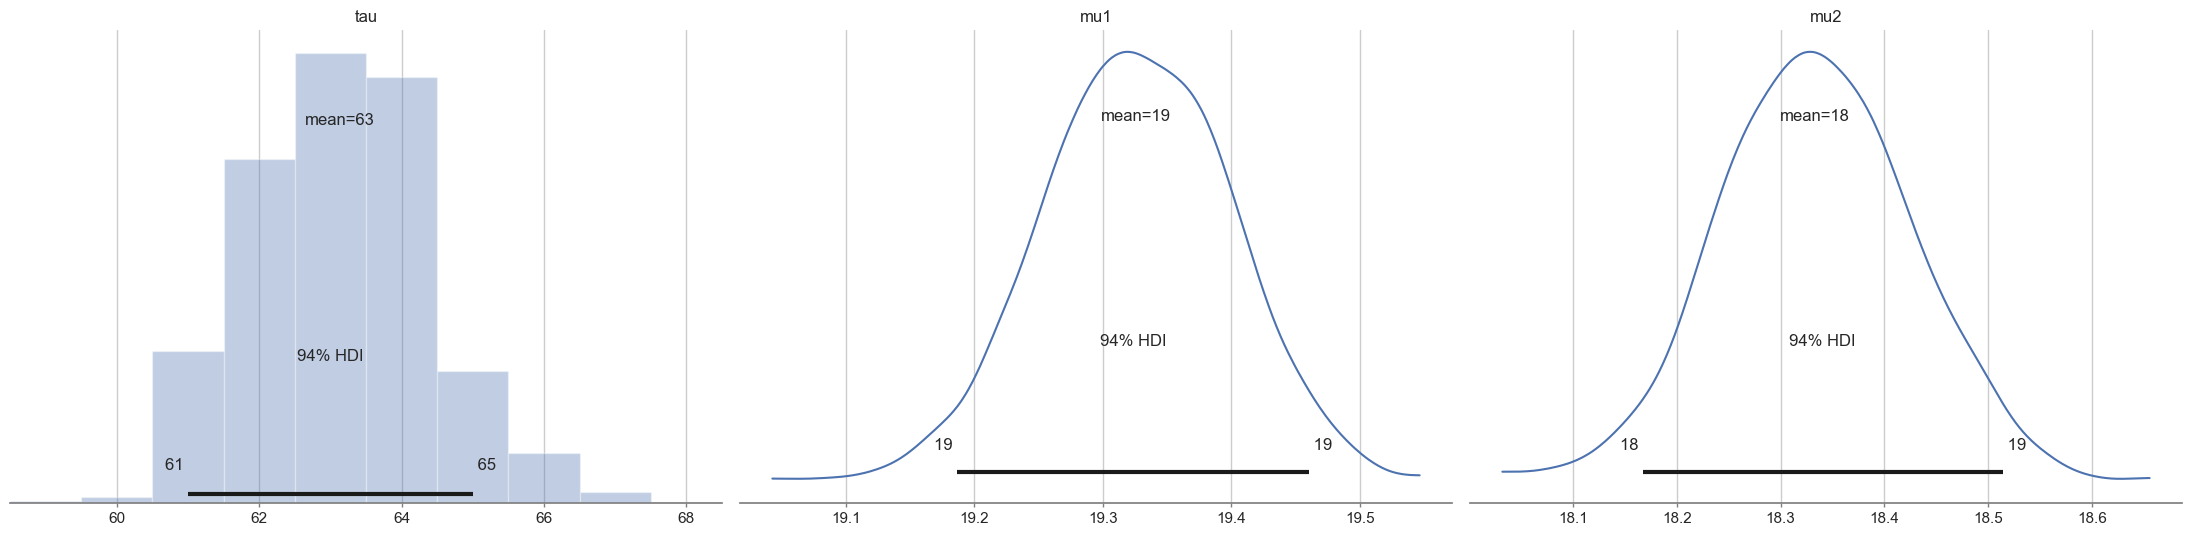

In [25]:
# Visualize tau (change point), mu1, mu2
plot_posterior(trace)


# 6. Extract and visualize the detected change point

Detected change point at index: 63


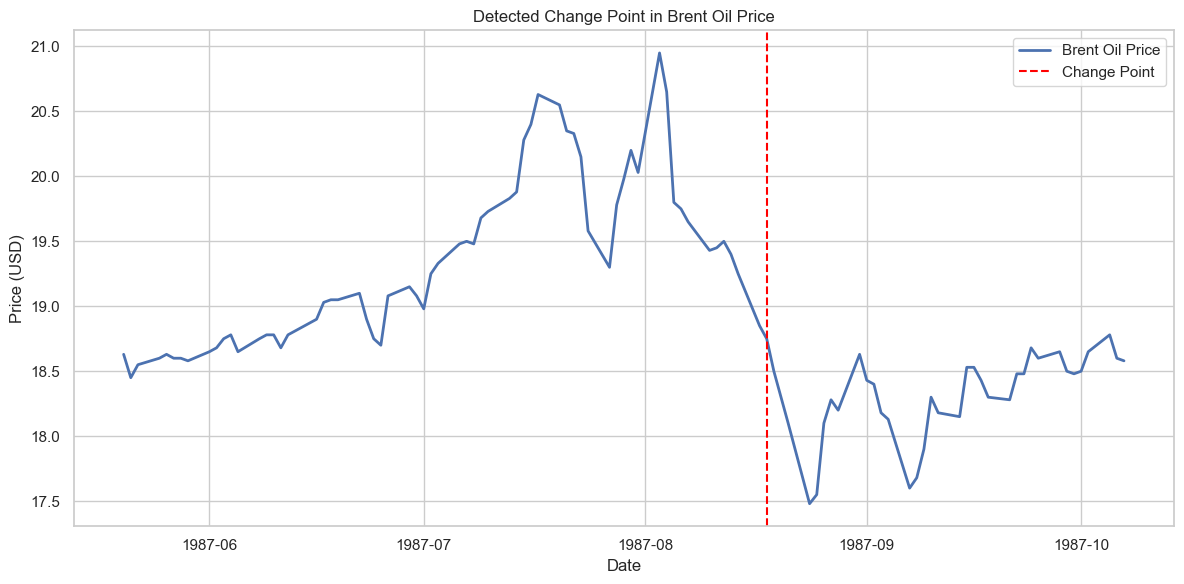

In [26]:
# Get the most probable change point index
change_point_index = get_change_point(trace)
print(f"Detected change point at index: {change_point_index}")

# Plot the price series with the change point
plt.figure(figsize=(12, 6))
plt.plot(df_price['Date'].iloc[:100], price_series, label='Brent Oil Price', linewidth=2)
plt.axvline(df_price['Date'].iloc[change_point_index], color='red', linestyle='--', label='Change Point')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Detected Change Point in Brent Oil Price")
plt.legend()
plt.tight_layout()
plt.show()


# 7.Plot trace

array([[<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'mu1'}>, <Axes: title={'center': 'mu1'}>],
       [<Axes: title={'center': 'mu2'}>, <Axes: title={'center': 'mu2'}>]],
      dtype=object)

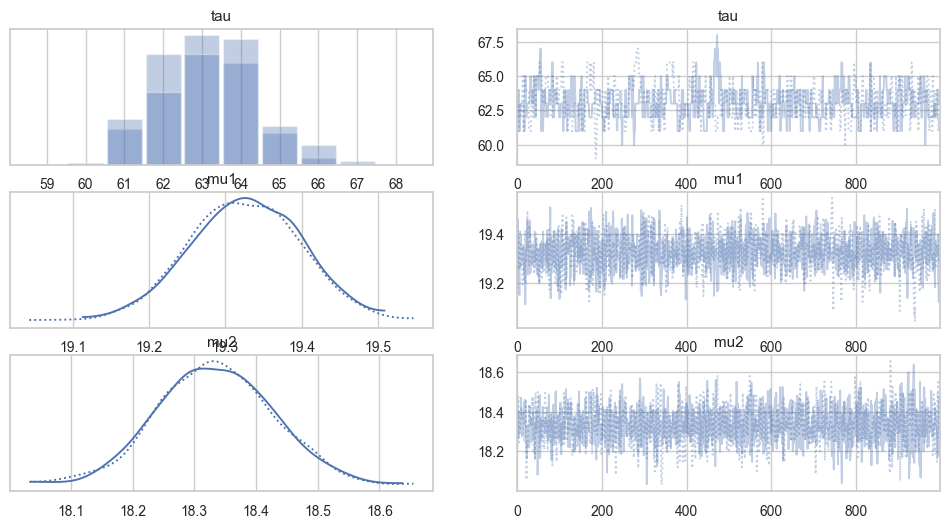

In [27]:
az.plot_trace(trace, var_names=["tau", "mu1", "mu2"])